#### **1.5.1. L'attention Mathématiquement**

##### **A. Représentation des séquences**

Considérons une sequence $X$ de $n$ tokens : $X = e_1, e_2, ..., e_n$ avec $e_j$ le $j^{eme}$ token au sein de la séquence $X$.

>Par exemple, considérons la phrase `Je suis Dorian`, alors la séquence $X$ correspondante est définie par :
>$$
X = 
\begin{pmatrix}
e_1=Je\\
e_2=suis\\
e_3=Dorian
\end{pmatrix}
$$

Considérons un token $e_j$ de la séquence $X$, alors la représentation vectoriel de ce token avant le layer d'attention est $h_j\in \mathbb{R}^d$ :
$$
h_j = 
\begin{pmatrix}
h_{j1}\\
h_{j2}\\
\vdots\\
h_{jd}
\end{pmatrix}
$$

- $d :$ La dimension de la représentation vectorielle du token $h_j$

La matrice $H$, avec $H\in \mathbb{R}^{d \times n},$ contenant toutes les representations des tokens **avant** le layer d'attention est alors : 
$$
H = 
\begin{pmatrix}
h_{1,1} & h_{2,1} & \cdots & h_{j,1} & \cdots & h_{n,1} \\
h_{1,2} & h_{2,2} & \cdots & h_{j,2} & \cdots & h_{n,2} \\
\vdots & \vdots & & \vdots & \ddots  & \vdots \\
h_{1,d} & h_{2,d} & \cdots & h_{j,d} & \cdots & h_{n,d} 
\end{pmatrix}
$$

##### **B. Calcul de l'attention**


**B.1. Calcul du score d'attention**


Le score d'attention $a_j$ pour le token $h_j$ est défini par :
$$a_j = \frac{h_{j}^{T}C}{\lambda}$$
- *$C \in \mathbb{R}^d:$* Le vecteur de contexte. Ce vecteur peut être vu comme une représentation de haut niveau d'une requête sur *"quel mot de la sequence est le plus informatif"*. Ce vecteur de contexte $C$ est initialisé the manière aléatoire et est actualisé/appris conjointement pendant le processus d'apprentissage.

- $\lambda :$ Le facteur d'échelle qui est souvent défini par une grande valeur, typiquement $\sqrt{d}$ où $d$ est le nombre d'éléments de $h_j$.


**B.2. Calcul du poids d'attention**


On obtient ainsi à partir de ce score d'attention $a_j$, le poids d'attention $\gamma_j \in \mathbb{R}$ :
$$\gamma_j = \frac{exp(a_j)}{\sum_k exp(a_k)} = softmax(a_j)$$

On calcul enfin le vecteur $h'_j$, tq $h'_j \in \mathbb{R}^{d}$ comme la représentation vectorielle du token $e_j$ : $h_j$ pondérée par son poids d'attention $\gamma_j$:
$$h'_j= \gamma_jh_j$$

La matrice $H'$, tq $H'\in \mathbb{R}^{d \times n},$ contenant toutes les representations des tokens **après** le layer d'attention est alors :
$$
H' = 
\begin{pmatrix}
h'_{1,1} & h'_{2,1} & \cdots & h'_{j,1} & \cdots & h'_{n,1} \\
h'_{1,2} & h'_{2,2} & \cdots & h'_{j,2} & \cdots & h'_{n,2} \\
\vdots & \vdots & & \vdots & \ddots  & \vdots \\
h'_{1,d} & h'_{2,d} & \cdots & h'_{j,d} & \cdots & h'_{n,d} 
\end{pmatrix}
$$


**Nouvelle Structue du RCNN avec Attention**

$$RCNNClassifier :$$
  $$(embedding)$$
  $$\downarrow$$
  $$(rnn)$$
  $$\downarrow$$
  $$(attention)$$
  $$\downarrow$$
  $$(pooling)$$
  $$\downarrow$$
  $$(linear)$$
  $$\downarrow$$
  $$(linear)$$
  $$\downarrow$$
  $$predictions$$

#### **1.5.2. Vectorisation du méchanimse d'attention**

##### **A. Initialisation des tenseurs**

On commence par définir $H$ et $C$ qui seront nos tenseurs qui contiendront respectivement les représentations vectorielle des tokens de $n$ séquence, ainsi que le vecteur de context.

- `b` représente le nombre de séquences
- `n` le nombre de tokens dans chaque séquence
- `d` la dimension dans laquelle sont représentés les vecteurs des tokens

soit les dimensions des deux tenseurs :
- $H \in \mathbb{R}^{b \times n \times d}$
- $C \in \mathbb{R}^{d}$

In [101]:
b = 2
n = 4
d = 5

H = torch.randn(b,n,d)
C = torch.randn(d)

print(f"{b} embedded sequence H :","\n",H.size(),"\n",H)
print("\nThe context Vector C :\n", C.size(),"\n", C)

2 embedded sequence H : 
 torch.Size([2, 4, 5]) 
 tensor([[[-0.4819,  1.4950, -1.4688,  0.6827,  0.3258],
         [ 0.5122,  1.2784,  1.4633,  1.8598, -1.0470],
         [-0.7455, -0.6188, -0.3958,  1.4219, -0.6399],
         [ 2.6214, -0.5536, -0.7393, -1.1938, -1.8634]],

        [[ 0.4392, -1.2443, -2.0950, -0.7921, -0.1704],
         [ 0.5200, -0.5217, -0.0728,  0.0324,  0.2185],
         [-0.3771,  0.9727,  1.1127,  0.2002, -0.6053],
         [-2.7837, -0.8259,  1.0619,  1.1062, -1.2159]]])

The context Vector C :
 torch.Size([5]) 
 tensor([ 0.6890,  0.8993, -0.2947, -1.0022,  1.0287])


##### **B. Calcul du tenseur des scores d'attention**

Soit $A$, le tenseur qui contient tous les scores d'attention pour chaque tokens. D'après la formule du score d'attention, on a $A \in \mathbb{R}^{b \times n}$.

Il suffit donc d'effectuer une multiplication matricielle entre les deux tenseurs $H$ et $C$, normalisée par $\sqrt{d}$, pour obtenir $A$

In [102]:
A = torch.matmul(H,C)/(d**(1/2))
print(f"\nThe attentions scores of the tokens for the {b} sequences :\n", A.size(), "\n", A)


The attentions scores of the tokens for the 2 sequences :
 torch.Size([2, 4]) 
 tensor([[ 0.4903, -0.8361, -1.3582,  0.3604],
        [ 0.1876,  0.0460, -0.2399, -2.3852]])


##### **C. Calcul du tenseur des poids d'attention**

Soit $\Gamma$, le tenseur contenant tous les poids d'attentions $\gamma_{jk}$ des tokens de chaque séquence.

Pour obtenir $\Gamma$, il suffit d'appliquer une $softmax$ sur le tenseur $A$. On obtient alors $\Gamma \in \mathbb{R}^{b \times n}$

In [103]:
Gamma = nn.Softmax(dim=1)(A)
print(f"\nthe attention weights for the {b} sequences :\n", Gamma.size(), "\n", Gamma)


the attention weights for the 2 sequences :
 torch.Size([2, 4]) 
 tensor([[0.4346, 0.1154, 0.0684, 0.3816],
        [0.3852, 0.3343, 0.2512, 0.0294]])


##### **D. Projection des poids d'attention de $\Gamma$ sur chaque tokens de $H$**

Soit $H'$, le nouveau tenseur contenant les séquences dont les tokens ont été pondérés par les poids d'attention de $\Gamma$.

Pour obtenir $H'$, il y a 2 possibilités :
- Itérer sur chaque séquence
- Effectuer un calcul matriciel sur la totalité du tenseur permettant de ne pas avoir à recourir à plusieurs itérations

Comprenons tout d'abord comment itérer sur chaque séquence.

**Méthode par itération**

Soit $h_j$, la séquence $j$ de $H$. Pour pouvoir projeter la valeur des poids d'attentions contenus dans $\gamma_j$ sur $h_j$ (multiplication scalaire), il est nécessaire de transformer le tenseur $\Gamma$.

En effet, comme nous avons $dim(\Gamma)=(b,n)$ et $dim(H)=(b, n, d)$, il n'est pas possible de multiplier ces deux tenseurs entre eux pour obtenir la projection scalaire. 

Pour effectuer cette opération, on commence par transformer $\Gamma$ de sorte à ce que $dim(\Gamma)=(b,1,n)$ pour que les tenseurs soient de même $ordre$ (ici $ordre = 3$).

In [104]:
Gamma_prime = Gamma.reshape(H.size()[0],1,H.size()[1])
Gamma_prime

tensor([[[0.4346, 0.1154, 0.0684, 0.3816]],

        [[0.3852, 0.3343, 0.2512, 0.0294]]])

Il est cependant encore impossible d'effectuer la projection scalaire par multiplication tensorielle entre $\Gamma$ et $H$ $\forall n$ car la dimension $2$ de $H$ n'est pas toujours égale à celle de $\Gamma$ ($\exists n \in \mathbb{R}, n \neq 1$). 

Pour palier à ce problème, on concatène des tenseurs nuls $\Theta$, tq $dim(\Theta)=(n-1,n)$, à chaque tenseurs au sein de la dimension 1 de $\Gamma'$ pour obtenir $\Gamma''$. On obtient alors $dim(\Gamma'')=(b, n, n)$.

In [105]:
Thetas = torch.zeros(H.size()[0],H.size()[1]-1,H.size()[1])
new_Gamma = torch.cat((Gamma_prime, Thetas), 1)
new_Gamma

tensor([[[0.4346, 0.1154, 0.0684, 0.3816],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.3852, 0.3343, 0.2512, 0.0294],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000]]])

Avec $\Gamma''$, il est alors possible de projeter les poids d'attentions $\gamma_jk$ contenus dans les premiers vecteurs de chaques tenseurs de $\Gamma$ sur chaque token des séquences de $H$. 

En effet, posons $\gamma_j$, le tenseurs $j$ des poids d'attentions et $h_j$, le tenseur $j$ de la représentation vectorielle de la séquence $j$. Alors $h_j'=\gamma_j^Th_j$.

On peut donc itérer sur $j$ pour obtenir la nouvelle représentation tensorielle $h_j'$ de $h_j$ après attention. Il suffit ainsi de rasssembler tous ces tenseurs dans un seul et même tenseur $H_j'$ pour obtenir les nouvelles représentations des séquences avec attention.

In [106]:
%%time
H_prime = torch.tensor([])
for j in range(b):
    h_prime = new_Gamma[j].T @ H[j] 
    H_prime = torch.cat((H_prime, h_prime.reshape(1,h_prime.size(0), h_prime.size(1))))
H_prime

CPU times: user 249 µs, sys: 907 µs, total: 1.16 ms
Wall time: 790 µs


tensor([[[-0.2094,  0.6497, -0.6383,  0.2967,  0.1416],
         [-0.0556,  0.1725, -0.1694,  0.0788,  0.0376],
         [-0.0330,  0.1023, -0.1005,  0.0467,  0.0223],
         [-0.1839,  0.5705, -0.5605,  0.2605,  0.1243]],

        [[ 0.1692, -0.4792, -0.8069, -0.3051, -0.0656],
         [ 0.1468, -0.4160, -0.7003, -0.2648, -0.0570],
         [ 0.1103, -0.3125, -0.5262, -0.1989, -0.0428],
         [ 0.0129, -0.0366, -0.0616, -0.0233, -0.0050]]])

**Méthode par multiplication tensorielle**

Il est très souvent déconseillé de créer des itérations dans nos algorithmes car cela multiplie énormément le nombre d'opération à faire. C'est pourquoi il est préférable de trouver une autre manière d'obtenir $H'$.

Il existe encore une fois 2 méthodes :
- Reprendre les étapes de la méthode par itération
- Transformer nos deux tenseurs en tenseurs 4D

Pour la première méthode, on reprend toutes les opérations jusqu'à l'obtention de $\Gamma''$ utilisées précédemment.

In [107]:
Gamma_prime = Gamma.reshape(H.size()[0],1,H.size()[1])
Thetas = torch.zeros(H.size()[0],H.size()[1]-1,H.size()[1])
new_Gamma = torch.cat((Gamma_prime, Thetas), 1)

La dernière étape change car on peut simplement utiliser une multiplication tensorielle entre $\Gamma''$ et $H$ pour obtenir $H'$:
$$H'=\Gamma''^{T_{dim(-2)}}H$$
> $X^{T_{dim(-2)}}$ désigne la transposée de $X$ selon ses 2 dernières dimensions

In [108]:
new_Gamma.mT

tensor([[[0.4346, 0.0000, 0.0000, 0.0000],
         [0.1154, 0.0000, 0.0000, 0.0000],
         [0.0684, 0.0000, 0.0000, 0.0000],
         [0.3816, 0.0000, 0.0000, 0.0000]],

        [[0.3852, 0.0000, 0.0000, 0.0000],
         [0.3343, 0.0000, 0.0000, 0.0000],
         [0.2512, 0.0000, 0.0000, 0.0000],
         [0.0294, 0.0000, 0.0000, 0.0000]]])

In [110]:
%%time
H_prime = new_Gamma.mT @ H
print(f"\nThe {b} weighted sequences after attention :\n", H_prime.size(), "\n",H_prime)


The 2 weighted sequences after attention :
 torch.Size([2, 4, 5]) 
 tensor([[[-0.2094,  0.6497, -0.6383,  0.2967,  0.1416],
         [-0.0556,  0.1725, -0.1694,  0.0788,  0.0376],
         [-0.0330,  0.1023, -0.1005,  0.0467,  0.0223],
         [-0.1839,  0.5705, -0.5605,  0.2605,  0.1243]],

        [[ 0.1692, -0.4792, -0.8069, -0.3051, -0.0656],
         [ 0.1468, -0.4160, -0.7003, -0.2648, -0.0570],
         [ 0.1103, -0.3125, -0.5262, -0.1989, -0.0428],
         [ 0.0129, -0.0366, -0.0616, -0.0233, -0.0050]]])
CPU times: user 113 ms, sys: 6.9 ms, total: 120 ms
Wall time: 5.09 ms


L'autre méthode est de transformer le tenseur $H$ en tenseur $4D$. La première dimension contiendra 2 éléments :
- Un tenseur contenant les tenseurs des séquences
- Un tenseur contenant des tenseurs nuls de même taille que ceux du premier élément

Cette opération est similaire à celle employé dans les deux méthodes précédentes car elle concatène des tenseurs nuls pour pouvoir effectuer une projection scalaire sur les séquence en utilisant une multiplication tensorielle.

Le tenseur $\Gamma$ doit aussi être transformé pour pouvoir être projeté sur le tenseur $H$ en concatenant de manière similaire des tenseurs nuls dans la dimension 2 de $H$.

In [111]:
new_H = torch.cat((H.reshape(1, *H.size()), torch.zeros(1,*H.size())), 0)
new_H

tensor([[[[-0.4819,  1.4950, -1.4688,  0.6827,  0.3258],
          [ 0.5122,  1.2784,  1.4633,  1.8598, -1.0470],
          [-0.7455, -0.6188, -0.3958,  1.4219, -0.6399],
          [ 2.6214, -0.5536, -0.7393, -1.1938, -1.8634]],

         [[ 0.4392, -1.2443, -2.0950, -0.7921, -0.1704],
          [ 0.5200, -0.5217, -0.0728,  0.0324,  0.2185],
          [-0.3771,  0.9727,  1.1127,  0.2002, -0.6053],
          [-2.7837, -0.8259,  1.0619,  1.1062, -1.2159]]],


        [[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000]],

         [[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000]]]])

In [112]:
new_Gamma = torch.cat((Gamma.reshape(*Gamma.size(),1), torch.zeros(*Gamma.size(),H.size()[-2]-1)), 2)
new_Gamma

tensor([[[0.4346, 0.0000, 0.0000, 0.0000],
         [0.1154, 0.0000, 0.0000, 0.0000],
         [0.0684, 0.0000, 0.0000, 0.0000],
         [0.3816, 0.0000, 0.0000, 0.0000]],

        [[0.3852, 0.0000, 0.0000, 0.0000],
         [0.3343, 0.0000, 0.0000, 0.0000],
         [0.2512, 0.0000, 0.0000, 0.0000],
         [0.0294, 0.0000, 0.0000, 0.0000]]])

On effectue ainsi le produit tensoriel entre $\Gamma_{tf}$ et $H_{tf}$ et il suffit de ne conserver que le premier élément de ce produit pour obtenir $H'$

In [113]:
(new_Gamma @ new_H)

tensor([[[[-0.2094,  0.6497, -0.6383,  0.2967,  0.1416],
          [-0.0556,  0.1725, -0.1694,  0.0788,  0.0376],
          [-0.0330,  0.1023, -0.1005,  0.0467,  0.0223],
          [-0.1839,  0.5705, -0.5605,  0.2605,  0.1243]],

         [[ 0.1692, -0.4792, -0.8069, -0.3051, -0.0656],
          [ 0.1468, -0.4160, -0.7003, -0.2648, -0.0570],
          [ 0.1103, -0.3125, -0.5262, -0.1989, -0.0428],
          [ 0.0129, -0.0366, -0.0616, -0.0233, -0.0050]]],


        [[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000]],

         [[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000]]]])

#### **1.5.3. Comparaison des temps de calculs des différentes méthodes de calcul de l'Attention**

In [114]:
%%time
def compute_attention_matrix_1(h, alpha):
    new_h = torch.cat((h.reshape(1, *h.size()), torch.zeros(1,*h.size())), 0)
    new_alpha = torch.cat((alpha.reshape(*alpha.size(),1), torch.zeros(*alpha.size(),h.size()[-2]-1)), 2)
    X_prime = (new_alpha @ new_h).sum(-2)[0]

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.11 µs


In [115]:
%%time
def compute_attention_matrix_2(H, Gamma):
    Gamma_prime = Gamma.reshape(H.size()[0],1,H.size()[1])
    Thetas = torch.zeros(H.size()[0],H.size()[1]-1,H.size()[1])
    new_Gamma = torch.cat((Gamma_prime, Thetas), 1)
    H_prime = new_Gamma.mT @ H

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


In [116]:
%%time
def compute_attention_loop(h, alpha):
    for i in range(h.size(0)):
        (torch.cat((alpha.reshape(h.size()[0],1,h.size()[1]), torch.zeros(h.size()[0],h.size()[1]-1,h.size()[1])), 1)[i].T @ h[i])

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


In [117]:
import time
def compare_attention_computation(h, alpha):   
    t1l = time.time()
    compute_attention_loop(h, alpha)
    t2l = time.time() - t1l
    t1m1 = time.time()
    compute_attention_matrix_1(h, alpha)
    t2m1 = time.time() - t1m1
    t1m2 = time.time()
    compute_attention_matrix_2(h, alpha)
    t2m2 = time.time() - t1m1
    return t2l, t2m1, t2m2

In [585]:
def plot_diff_computation_attention(batch_size, inf=1, sup=10, token_len=76, hidden_size=768):
    time_m1 = []
    time_m2 = []
    time_l = []
    x = [i for i in range(inf, sup)]
    for i in tqdm(range(inf, sup)):
        h = torch.randn(batch_size*i,token_len,hidden_size)
        C = torch.randn(hidden_size)
        a = torch.matmul(h,C)/(hidden_size**(1/2))
        alpha = torch.exp(a)/torch.sum(torch.exp(a))
        
        l, m1, m2 = compare_attention_computation(h, alpha)
        time_m1.append(m1)
        time_m2.append(m2)
        time_l.append(l)
        
    
    fig, ax = plt.subplots(figsize=(15,8))
    ax.scatter(x, time_m1, color='red', label="matrix time method 1")
    ax.scatter(x, time_m2, color='green', label="matrix time method 2")
    ax.scatter(x, time_l, color='blue', label="loop time")
    plt.ylabel('seconds')
    plt.xlabel(f'number of batch')
    plt.title(f"Calculation time difference depending on batch number, batch size = {batch_size}")
    plt.legend()
    plt.show()
    return x, time_l, time_m1, time_m2

100%|███████████████████████████████████████████████████████████████████████████████████| 59/59 [23:08<00:00, 23.53s/it]


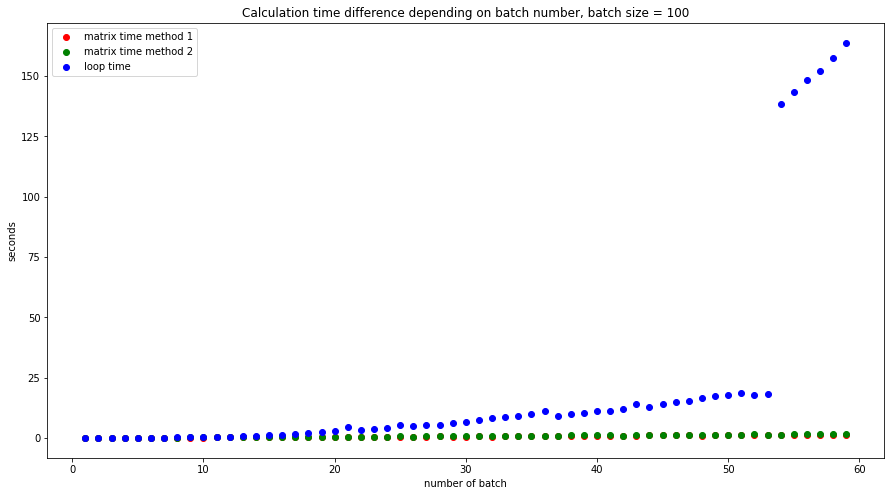

In [586]:
x, time_l, time_m1, time_m2 = plot_diff_computation_attention(100, inf=1, sup=60)

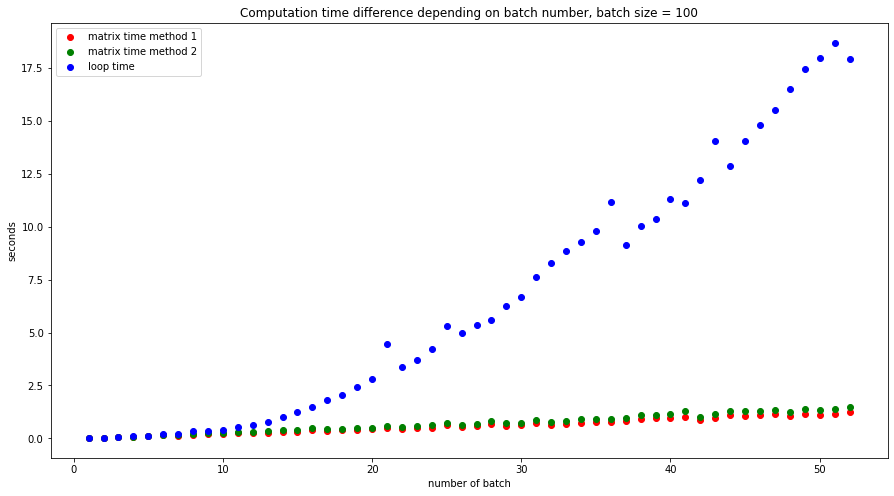

In [604]:
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(x[:-7], time_m1[:-7], color='red', label="matrix time method 1")
ax.scatter(x[:-7], time_m2[:-7], color='green', label="matrix time method 2")
ax.scatter(x[:-7], time_l[:-7], color='blue', label="loop time")
plt.ylabel('seconds')
plt.xlabel(f'number of batch')
plt.title(f"Computation time difference depending on batch number, batch size = {100}")
plt.legend()
plt.show()

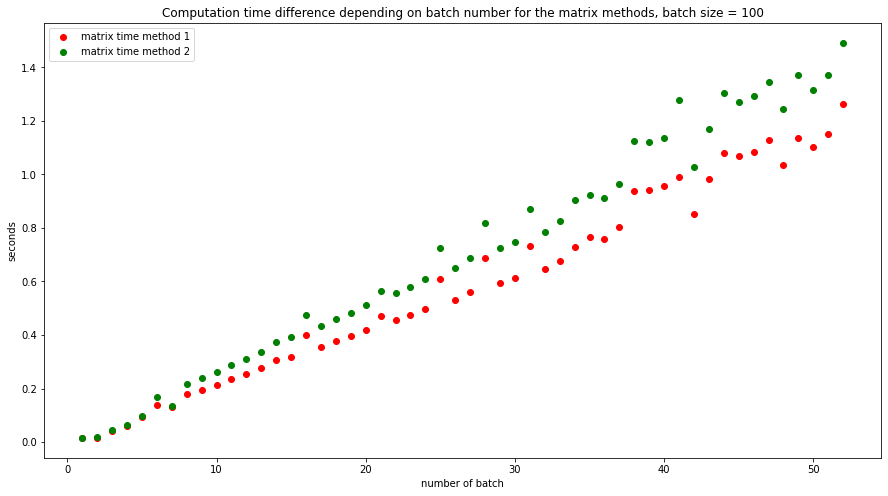

In [603]:
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(x[:-7], time_m1[:-7], color='red', label="matrix time method 1")
ax.scatter(x[:-7], time_m2[:-7], color='green', label="matrix time method 2")
plt.ylabel('seconds')
plt.xlabel(f'number of batch')
plt.title(f"Computation time difference depending on batch number for the matrix methods, batch size = {100}")
plt.legend()
plt.show()

**On remarque ainsi que l'Attention est calculée bien plus rapidement en utilisant les deux méthodes de calculs tensoriel.**

**En revanche, ces deux méthodes ont des temps de calcul très similaires**